In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### age = age of the patient
### sex = gender; 1 = male, 0= female
### cp = chest pain type. there are four types of pain included.
### trestbps = resting blood pressure during admission time in hospital
### chol = serum cholestoral in mg/dl 
### fbs = fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
### restecg = resting electrocardiographic results 
### thalach = maximum heart rate achieved 
### exang = exercise induced angina(chest pain) (1 = yes; 0 = no)
### oldpeak = ST depression induced by exercise relative to rest 
### slope = the slope of the peak exercise ST segment 
### ca = number of major vessels (0-3) colored by flourosopy 
### thal = 3 = normal; 6 = fixed defect; 7 = reversable defect 
### target = 0 = no heart disease, 1 = yes heart disease.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.shape

(303, 14)

## there are 303 rows and 14 columns

In [9]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

### there are 207 male patient and 96 female patient

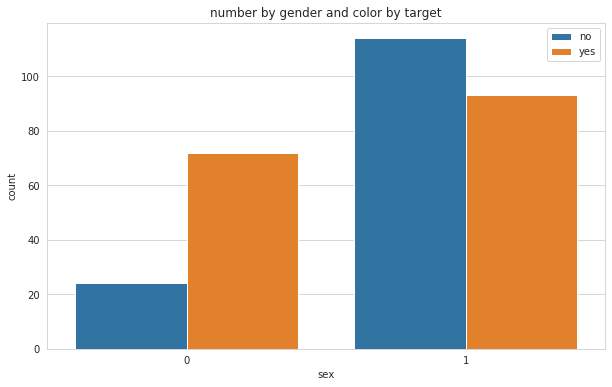

In [13]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot('sex',data = df,hue='target')
plt.title('number by gender and color by target')
plt.legend(('no' , 'yes'))

### we can see incase of female there is more patient with heart disease.
### incase of male the patient with heart disease is slightly less than patient with no heart disease.

In [14]:
df.groupby('sex').target.value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

### so there are 72 females and 93 males patient with heart disease.

### let us see the relation between every variables at a glance

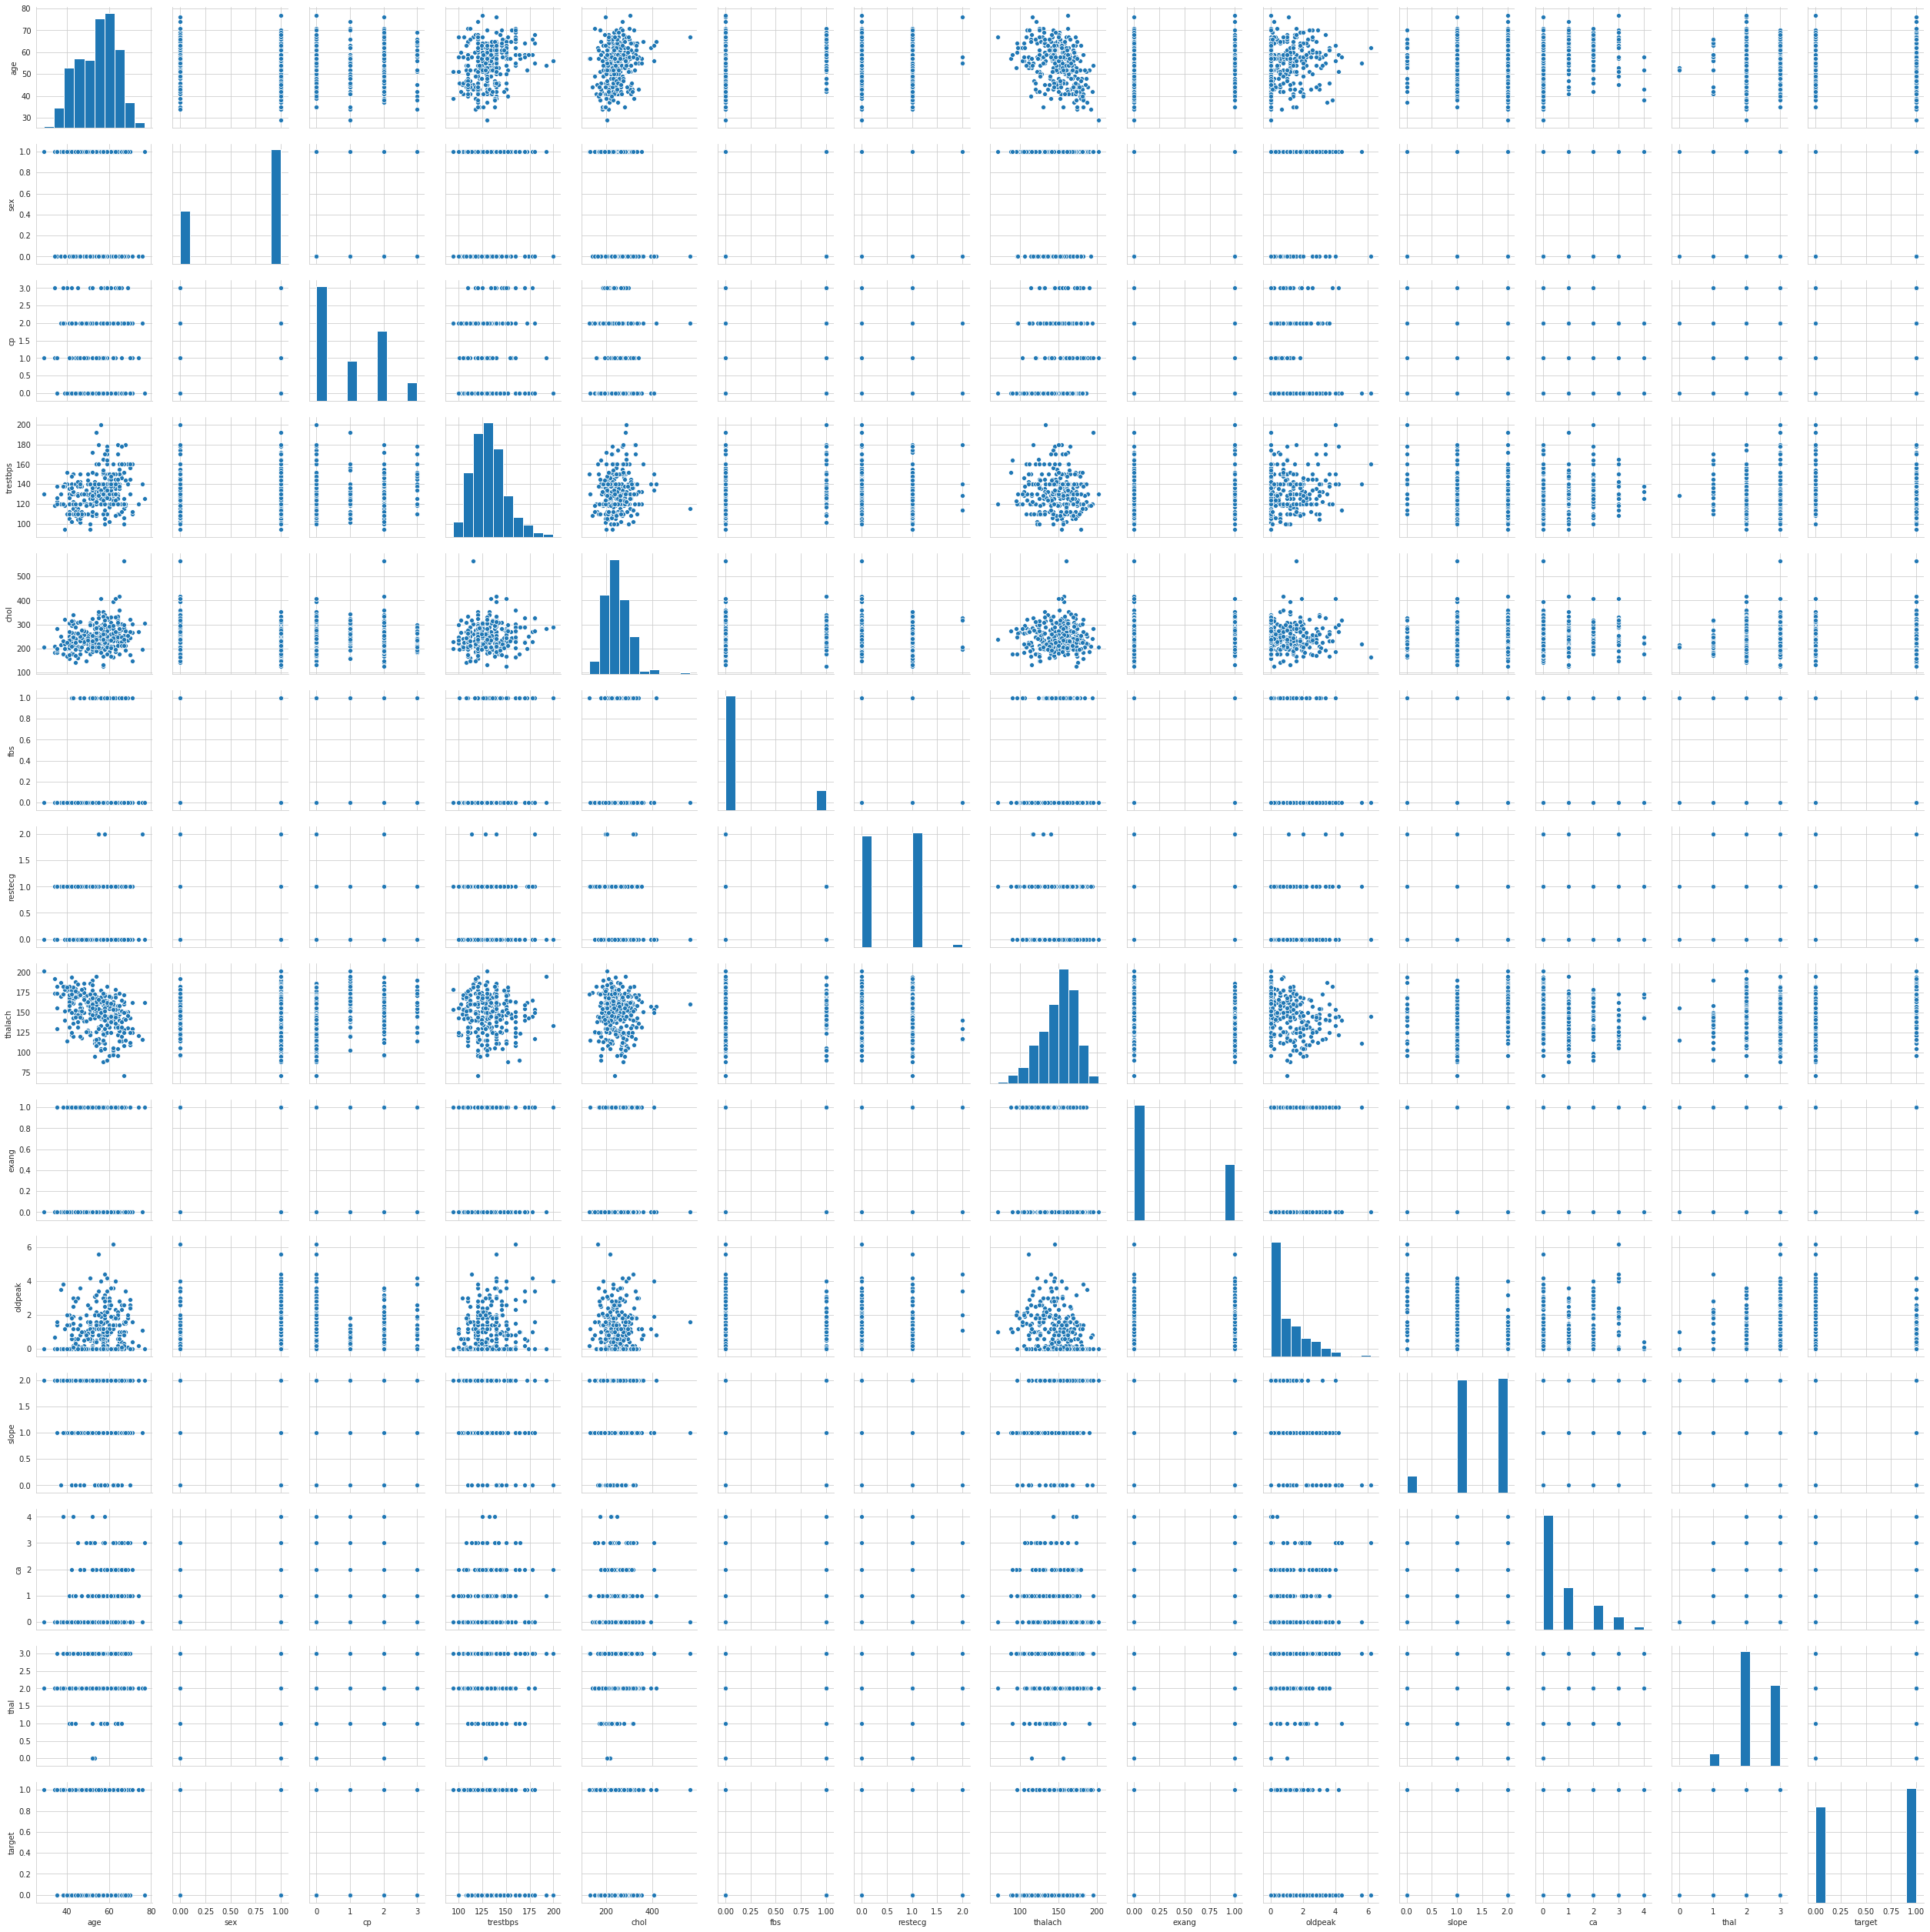

In [15]:
sns.pairplot(data = df)

Text(26.779583333333342, 0.5, 'maximum heart rate')

<Figure size 720x432 with 0 Axes>

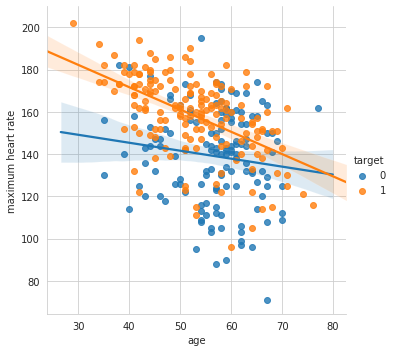

In [17]:
plt.figure(figsize=(10,6))
sns.lmplot(x="age", y="thalach", hue="target", data=df)
plt.ylabel('maximum heart rate')

### with increase in age the maximum heart rate is decreased.

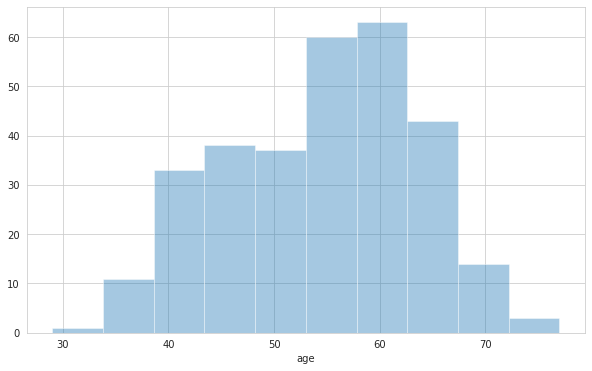

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(df['age'],bins = 10,kde = False)

### the age group between 55 to 65 are taken more in sample.

Text(0.5, 0, 'chest pain type')

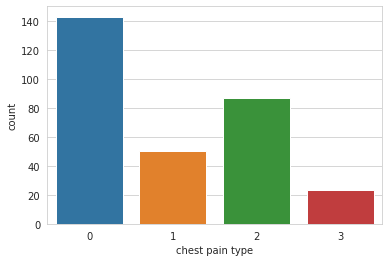

In [21]:
sns.countplot('cp',data=df)
plt.xlabel('chest pain type')

### there are more patient with chest pain type 0.

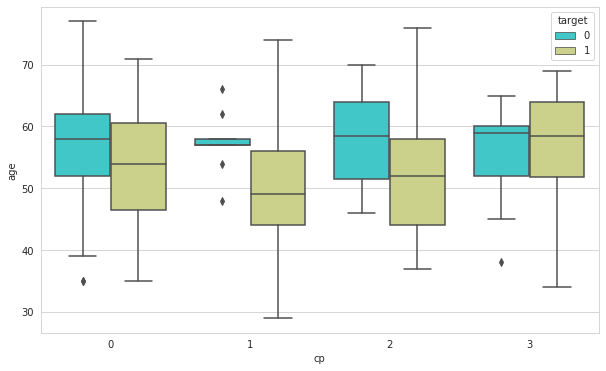

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x="cp", y="age", data=df,hue = 'target',palette='rainbow')

### patient with chest pain are more from age gap between 55 to 65. also people of age is more incase of type 3 chest pain having heart disease.

## let us try to do some machine learning to classify a patinet having heart disease or not.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis=1), 
                                                    df['target'], test_size=0.30, 
                                                    random_state=101)

### let us start from logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/home/cyras/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
predictions_log= logmodel.predict(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [32]:
print(classification_report(y_test,predictions_log))

              precision    recall  f1-score   support

           0       0.95      0.80      0.86        44
           1       0.83      0.96      0.89        47

    accuracy                           0.88        91
   macro avg       0.89      0.88      0.88        91
weighted avg       0.89      0.88      0.88        91



In [33]:
print(confusion_matrix(y_test,predictions_log))

[[35  9]
 [ 2 45]]


In [34]:
print('Accuracy Score: ',accuracy_score(y_test,predictions_log))

Accuracy Score:  0.8791208791208791


### time for KNN

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
scaler.fit(df.drop('target',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
scaled_features = scaler.transform(df.drop('target',axis=1))

In [39]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [40]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['target'],
                                                    test_size=0.30)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

### choosing suitable value of 'k' by elbow method

In [42]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

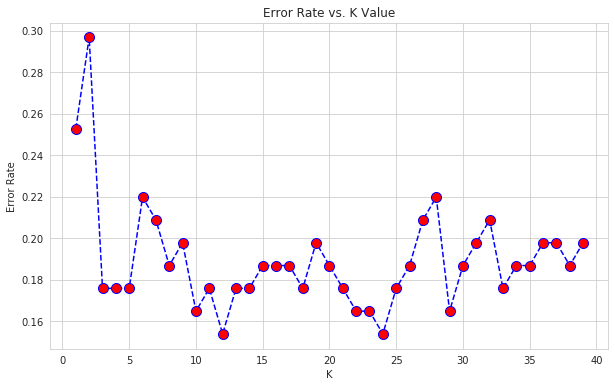

In [43]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### let us choose the value of k = 13

In [45]:
# NOW WITH K=13
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=13')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=13


[[30  6]
 [10 45]]


              precision    recall  f1-score   support

           0       0.75      0.83      0.79        36
           1       0.88      0.82      0.85        55

    accuracy                           0.82        91
   macro avg       0.82      0.83      0.82        91
weighted avg       0.83      0.82      0.83        91



In [46]:
print('Accuracy Score: ',accuracy_score(y_test,pred))

Accuracy Score:  0.8241758241758241


### classifying from decision tree.

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis=1), 
                                                    df['target'], test_size=0.30, 
                                                    random_state=101)

In [49]:
dtree = DecisionTreeClassifier()

In [50]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [51]:
predictions = dtree.predict(X_test)

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.66      0.77        44
           1       0.75      0.96      0.84        47

    accuracy                           0.81        91
   macro avg       0.84      0.81      0.81        91
weighted avg       0.84      0.81      0.81        91



In [53]:
print(confusion_matrix(y_test,predictions))

[[29 15]
 [ 2 45]]


In [54]:
print('Accuracy Score: ',accuracy_score(y_test,predictions))

Accuracy Score:  0.8131868131868132


### let us try form SVM

In [55]:
from sklearn.svm import SVC

In [56]:
model = SVC()

In [57]:
model.fit(X_train,y_train)

/home/cyras/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [58]:
predictions_svc = model.predict(X_test)

In [59]:
print(classification_report(y_test,predictions_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.52      1.00      0.68        47

    accuracy                           0.52        91
   macro avg       0.26      0.50      0.34        91
weighted avg       0.27      0.52      0.35        91



/home/cyras/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [60]:
print(confusion_matrix(y_test,predictions_svc))

[[ 0 44]
 [ 0 47]]


### parameter has to be adjusted as our model has performed very worst with no prediction for target 'o'.
### for this we use grid search cv .

In [61]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [64]:
grid.fit(X_train,y_train)

/home/cyras/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.556, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.557, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.557, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.556, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.557, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.557, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.556, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.557, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.557, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.500, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.443, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.486, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.611, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.5s finished
/home/cyras/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [65]:
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [66]:
grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [67]:
grid_predictions = grid.predict(X_test)

In [68]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        44
           1       0.78      0.91      0.84        47

    accuracy                           0.82        91
   macro avg       0.84      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



In [69]:
print(confusion_matrix(y_test,grid_predictions))

[[32 12]
 [ 4 43]]


In [70]:
print('Accuracy Score: ',accuracy_score(y_test,grid_predictions))

Accuracy Score:  0.8241758241758241


Text(0, 0.5, 'models')

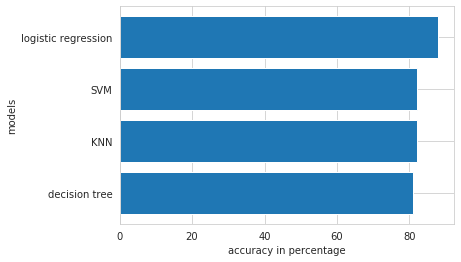

In [71]:
models = ['decision tree','KNN','SVM','logistic regression']
accuracy = [81,82,82,88]
plt.barh(models,accuracy)
plt.xlabel('accuracy in percentage')
plt.ylabel('models')

### finally logistic regression seem to classify more accurately than other.